<a href="https://colab.research.google.com/github/rjhalliday/python-examples/blob/main/keras_early_stopping_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Keras early stopping example

In this example we use make_classification to generative synthetic classification data, check out my other notebook on make_classification examples.
* We generate a synthetic dataset with make_classification.
* We split the dataset into training and testing sets using train_test_split.
* We define a simple neural network with two hidden layers using Keras's Sequential API.
* We compile the model with the Adam optimizer and binary cross-entropy loss.
* We set up early stopping to monitor the validation loss (val_loss), with a patience of 10 epochs. If the validation loss does not improve for 10 consecutive epochs, training will stop, and the model will restore the best weights obtained during training.
* Finally, we evaluate the model on the test set and print the test accuracy.

To use EarlyStopping effectively, we need to specify a validation_split (or provide validation_data) in the model.fit call to make sure there is a validation set available for monitoring. In this case we choose a validation_split of 20% (0.2)



In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

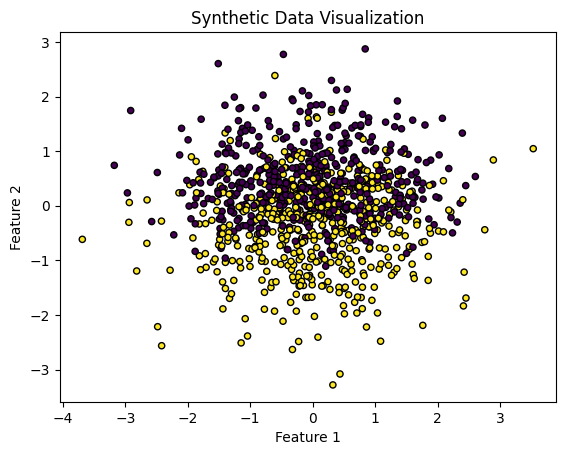

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7099 - loss: 0.6138 - val_accuracy: 0.7875 - val_loss: 0.4938
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8164 - loss: 0.4838 - val_accuracy: 0.8313 - val_loss: 0.4008
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8650 - loss: 0.3895 - val_accuracy: 0.8625 - val_loss: 0.3365
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8692 - loss: 0.3398 - val_accuracy: 0.8813 - val_loss: 0.3052
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8757 - loss: 0.3189 - val_accuracy: 0.8750 - val_loss: 0.2883
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8683 - loss: 0.3089 - val_accuracy: 0.8813 - val_loss: 0.2799
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9033 - loss: 0.2814 - val_accuracy: 0.8813 - val_loss: 0.2712
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9087 - loss: 0.2535 - val_accuracy: 0.8687 - 

In [9]:



# Generate synthetic classification data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# visualize a sample of the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
plt.title("Synthetic Data Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple sequential model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Define early stopping callback
#  monitor='val_loss': This specifies that the callback should monitor the validation loss. If the validation loss does not improve, training will stop.
#  patience=5: This specifies the number of epochs with no improvement after which training will be stopped. If validation loss does not improve for 5 consecutive epochs, training will be halted.
#  verbose=1: This provides output messages during training to indicate when early stopping is triggered.
#  mode='auto': This automatically determines whether to minimize or maximize the monitored quantity. For 'val_loss', it will minimize the loss.
#  restore_best_weights=True: When training stops early, the model weights will be restored to the best weights observed during training (i.e., the weights that resulted in the best validation loss).
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train,
                    epochs=100,
                    mode='auto',
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


# Let's try this again with greater class seperation in make_classification (class_set = 2)

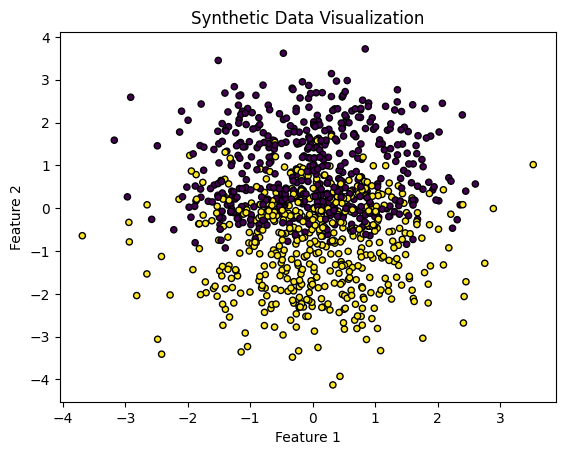

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.7630 - loss: 0.5355 - val_accuracy: 0.9500 - val_loss: 0.2845
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9551 - loss: 0.2479 - val_accuracy: 0.9875 - val_loss: 0.1510
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9670 - loss: 0.1601 - val_accuracy: 0.9875 - val_loss: 0.1003
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9803 - loss: 0.1203 - val_accuracy: 0.9875 - val_loss: 0.0767
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9805 - loss: 0.0819 - val_accuracy: 0.9875 - val_loss: 0.0655
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9787 - loss: 0.1109 - val_accuracy: 0.9875 - val_loss: 0.0618
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9835 - loss: 0.0810 - val_accuracy: 0.9875 - val_loss: 0.0583
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9731 - loss: 0.1076 - val_accuracy: 0.9875 - 

In [13]:



# Generate synthetic classification data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, class_sep = 2, random_state=42)

# visualize a sample of the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
plt.title("Synthetic Data Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple sequential model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Define early stopping callback
#  monitor='val_loss': This specifies that the callback should monitor the validation loss. If the validation loss does not improve, training will stop.
#  patience=5: This specifies the number of epochs with no improvement after which training will be stopped. If validation loss does not improve for 5 consecutive epochs, training will be halted.
#  verbose=1: This provides output messages during training to indicate when early stopping is triggered.
#  mode='auto': This automatically determines whether to minimize or maximize the monitored quantity. For 'val_loss', it will minimize the loss.
#  restore_best_weights=True: When training stops early, the model weights will be restored to the best weights observed during training (i.e., the weights that resulted in the best validation loss).
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


You can see in the above code that, because of the greater class separation, the network's result is more accurate